
# **3-1 - Churn Analysis**

Marketing and Customer Analytics

# 1. Business Understanding
---

In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# import datetime package
import datetime as dt

# set display
pd.set_option("display.max_columns", None)

## 1.1 Business Objective
----

- Reduce 10% churn rate customer in the next period 2020
- Increase 5% monthly sales in the next period 2020
## 1.2 Business Question
---

- What is the churn rate / customer retention rate?
- What are the possible marketing initiatives to prevent/reduce churn?

## 1.3 Analysis
---

- Data Exploration
- Cohort Analysis
- Retention and Revenue Analysis

# 2. Workflow
---

### 1. <font color='blue'> Importing Data to Python</font>
    * Data validation
### 2. <font color='blue'> Data Exploration</font>
    * Building customer cohort table, gaining insights, and business recommendation

 # 3. Importing Data
---

## 3.1 Data Description
The data set contains 500K rows and 8 columns. The following is the description of each column.

- `TransactionNo` (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.

- `Date` (numeric): the date when each transaction was generated.

- `ProductNo` (categorical): a five or six-digit unique character used to identify a specific product.

- `Product` (categorical): product/item name.

- `Price` (numeric): the price of each product per unit in pound sterling (£).

- `Quantity` (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.

- `CustomerNo` (categorical): a five-digit unique number that defines each customer.

Original Dataset: [Ecommerce Dataset](https://https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business)

## 3.2 Import Data

In [2]:
# read dataset function
def read_data(path):
    """
    Reads a CSV file at the given path, removes any duplicate rows,
    and returns its contents as a pandas DataFrame.

    Parameters
    ----------
    path : str
        input path

    Returns
    -------
    data : pandas Dataframe
        Sample dataframe
    """
    # 1. Read data
    data = pd.read_csv(path,
                       index_col = 0,
                       low_memory = False) # Disable automatic type inference for memory efficiency

    # 2. Drop duplicates
    data = data.drop_duplicates()

    # 3. Reset index
    data = data.reset_index()

    # 4. print data shape
    print('Data shape :', data.shape)

    return data

In [3]:
# Read data
data = read_data(path = 'retail_data.csv')

Data shape : (335428, 7)


In [4]:
# shanity check
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0


In [5]:
# check data type
data.dtypes

,0
TransactionNo,object
Date,object
ProductNo,object
ProductName,object
Price,float64
Quantity,float64
CustomerNo,float64


# 5. Exploratory Data Analysis
---

In [6]:
# copy train_set data
eda = data.copy()

## EDA - PART 1
---

Check the data:
- Missing values
- Duplicated values
- Descriptive statistic

Exploring:
- Date
- ProductNo
- ProductName
- Price
- Quantity
- CustomerNo

### 5.1 Check Missing Values
----

In [7]:
eda.isna().sum()

,0
TransactionNo,0
Date,0
ProductNo,0
ProductName,0
Price,1
Quantity,1
CustomerNo,1


### 5.2 Check Duplicated Values & Data Types
---

In [8]:
# check duplicated data
print(f"Number of duplicated rows: {eda.duplicated().sum()}")

Number of duplicated rows: 0


In [9]:
# check data types
eda.dtypes

,0
TransactionNo,object
Date,object
ProductNo,object
ProductName,object
Price,float64
Quantity,float64
CustomerNo,float64


### 5.3 Descriptive Statistics
---

In [10]:
eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,335427.0,12.185808,6.996458,5.13,10.68,11.92,13.62,660.62
Quantity,335427.0,9.398626,202.185188,-80995.00,1.00,3.00,10.00,80995.00
CustomerNo,335427.0,15441.753455,1609.183814,12004.00,14096.00,15434.00,16824.00,18287.00


In [11]:
# filter the quantity
eda_filtered = eda[eda['Quantity']>0]

In [12]:
# describe
eda_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,330611.0,12.157123,6.451653,5.13,10.68,11.92,13.62,660.62
Quantity,330611.0,9.969871,146.866994,1.00,1.00,3.00,10.00,80995.00
CustomerNo,330611.0,15442.920777,1609.545117,12004.00,14096.00,15434.00,16827.00,18287.00


### 5.4 `Date` Variable
---

In [13]:
# change data types
eda_filtered['Date'] = pd.to_datetime(eda_filtered['Date'])

<ipython-input-13-9781fc877a05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_filtered['Date'] = pd.to_datetime(eda_filtered['Date'])


In [14]:
# shanity check
eda_filtered.dtypes

,0
TransactionNo,object
Date,datetime64[ns]
ProductNo,object
ProductName,object
Price,float64
Quantity,float64
CustomerNo,float64


In [15]:
print(f"First Transaction date : {eda_filtered['Date'].min()}")
print(f"Last Transaction date : {eda_filtered['Date'].max()}")

First Transaction date : 2019-04-19 00:00:00
Last Transaction date : 2019-12-09 00:00:00


### 5.5 `ProductNo` Variable
---

In [16]:
print(f" There are {eda_filtered['ProductNo'].nunique()} unique product sold in 1 year")

 There are 3472 unique product sold in 1 year


### 5.6 `Price` Variable
---

In [17]:
eda_filtered['Price'].describe()

,Price
count,330611.000000
mean,12.157123
std,6.451653
min,5.130000
25%,10.680000
50%,11.920000
75%,13.620000
max,660.620000


(0.0, 20.0)

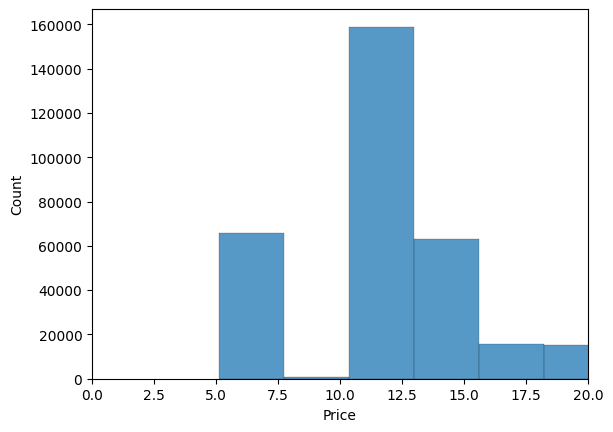

In [18]:
sns.histplot(eda_filtered['Price'], bins=250)
plt.xlim(0,20)

Text(0.5, 1.0, 'Boxplot Price Distribution')

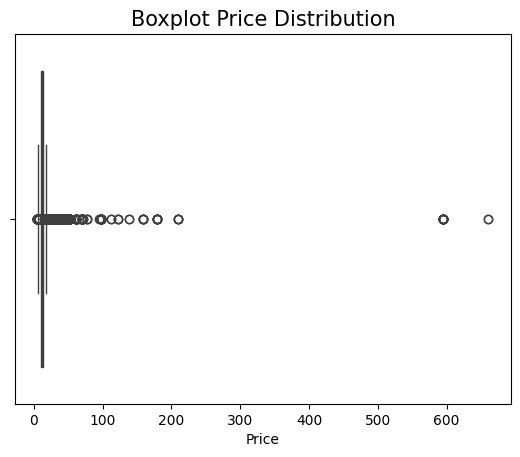

In [19]:
sns.boxplot(x=eda_filtered['Price'])
plt.title('Boxplot Price Distribution', fontsize='15')

In [20]:
# check product with price > 500
eda_filtered[eda_filtered['Price']>500]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo
97793,573905,2019-11-01,22655,Vintage Red Kitchen Cabinet,594.50,1.0,16971.0
108726,572911,2019-10-26,22655,Vintage Red Kitchen Cabinet,594.50,2.0,16345.0
115324,572281,2019-10-23,22655,Vintage Red Kitchen Cabinet,594.50,1.0,17211.0
131354,570827,2019-10-12,22656,Vintage Blue Kitchen Cabinet,594.50,1.0,15831.0
165579,567868,2019-09-22,22655,Vintage Red Kitchen Cabinet,594.50,2.0,17603.0
182658,566283,2019-09-11,22655,Vintage Red Kitchen Cabinet,594.50,1.0,17838.0
260363,558762,2019-07-03,22655,Vintage Red Kitchen Cabinet,594.50,2.0,15023.0
266568,558092,2019-06-26,22656,Vintage Blue Kitchen Cabinet,594.50,1.0,14808.0
269973,557676,2019-06-22,22655,Vintage Red Kitchen Cabinet,594.50,2.0,15804.0
272211,557471,2019-06-20,22655,Vintage Red Kitchen Cabinet,594.50,2.0,15825.0


### 5.7 `Quantity` Variable
---

Text(0.5, 1.0, 'Boxplot Quantity Distribution')

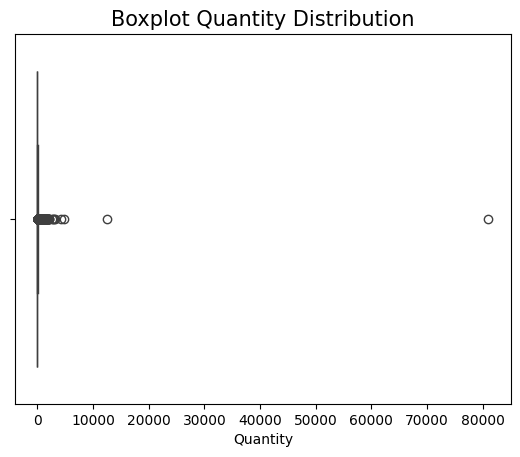

In [21]:
sns.boxplot(x=eda_filtered['Quantity'])
plt.title('Boxplot Quantity Distribution', fontsize='15')

In [22]:
# check descriptive stats
eda_filtered.describe()

,Date,Price,Quantity,CustomerNo
count,330611,330611.000000,330611.000000,330611.000000
mean,2019-09-06 08:07:03.448705280,12.157123,9.969871,15442.920777
min,2019-04-19 00:00:00,5.130000,1.000000,12004.000000
25%,2019-07-08 00:00:00,10.680000,1.000000,14096.000000
50%,2019-09-22 00:00:00,11.920000,3.000000,15434.000000
75%,2019-11-08 00:00:00,13.620000,10.000000,16827.000000
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000
std,NaN,6.451653,146.866994,1609.545117


In [23]:
# filter with quanitiy > 10000
eda_filtered[eda_filtered['Quantity'] > 10000]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo
78,581483,2019-12-09,23843,Paper Craft Little Birdie,12.38,80995.0,16446.0
38553,578841,2019-11-25,84826,Asstd Design 3d Paper Stickers,6.19,12540.0,13256.0


In [24]:
# check the data
eda_filtered.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0


In [25]:
eda_filtered[eda_filtered['TransactionNo'].str.contains('C')]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo


In [26]:
print(f"Number of unique customer  : {eda['CustomerNo'].nunique()}")
print(f"Number of unique valid customer : {eda_filtered['CustomerNo'].nunique()}")

Number of unique customer  : 3709
Number of unique valid customer : 3694


## EDA - PART 2
---

Cohort Analysis
- Step 1: Month Extraction from InvoiceDate Column
- Step 2: Assigning Cohorts to Each Column
- Step 3: Assigning Cohort Index to each transaction
- Step 4: Calculating number of unique customers in each Group of (CohortDate,Index)
- Step 5: Retention rate Calculation
- Step 6: Visualizing the Above Retention rate

In [27]:
# copy data
data_cohort = eda_filtered.copy()

In [28]:
# shanity check
data_cohort.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0


### 5.10 Step 1: Month Extraction from InvoiceDate Column
---

In [29]:
# create month extraction function
def extract_month(date_value):
    """
    Extracts the first day of the month from a given date.

    Parameter:
    ----------
    date_value: pandas dataframe
            The input date

    Returns:
    --------
    datetime: pandas dataframe
           The first day of the month corresponding to the input date
    """
    # Returns a new datetime object with the same year
    # and same month as the input date, but with day set to 1.
    return dt.datetime(date_value.year, date_value.month, 1)

In [30]:
# Creating InvoiceMonth column using the function created in previous step
data_cohort['Month'] = data_cohort['Date'].apply(extract_month)

In [31]:
# read InvoiceData and InvoiceMonth
data_cohort[['Date','Month']].head()

,Date,Month
0,2019-12-09,2019-12-01
1,2019-12-09,2019-12-01
2,2019-12-09,2019-12-01
3,2019-12-09,2019-12-01
4,2019-12-09,2019-12-01


### 5.11 Step 2: Assigning Cohorts to Each Column
---

In [32]:
# groupby Customer ID and show Invoice Month
data_cohort['CohortMonth'] = data_cohort.groupby('CustomerNo')['Month'].transform('min')

In [33]:
# shanity check
data_cohort.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Month,CohortMonth
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,2019-12-01,2019-06-01
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0,2019-12-01,2019-05-01
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,2019-12-01,2019-05-01
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,2019-12-01,2019-05-01
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,2019-12-01,2019-05-01


### 5.12 Step 3: Assigning Cohort Index to each transaction
---

In [34]:
# create function to extract month and year
def parse_dates_int(date_column):
    """
    Extracts the year and month components from a pandas Datetime column.

    Parameter
    ---------
    date_column: pandas series
        A pandas Series containing datetime values.

    Returns
    --------
    year: pandas series
        the extracted year values

    month: pandas series
        the extracted month values
    """
    year = date_column.dt.year
    month = date_column.dt.month

    return year, month


In [35]:
def run_parse_date(data_cohort):
    """
    Extracts the year and month components from a pandas Datetime column.

    Parameter
    ---------

    data_cohort: pandas dataframe
              pandas dataframe with assigned cohort each transaction

    Returns
    --------

    data_cohort: pandas dataframe
              pandas dataframe with index value
    """

    # Get the integers for date parts from the `InvoiceDay` column
    invoice_year, invoice_month = parse_dates_int(data_cohort['Date'])

    # Get the integers for date parts from the `CohortDay` column
    cohort_year, cohort_month = parse_dates_int(data_cohort['CohortMonth'])


    """
    - This code bellow calculates the difference in years and months
    - The difference is between the invoice date and the cohort date.
    - It then uses these differences to calculate a cohort index
    - The index represents the number of months passed between the two dates
    """

    # Calculate difference in years
    years_diff = invoice_year - cohort_year

    # Calculate difference in months
    months_diff = invoice_month - cohort_month

    # Using the variables created above to calcualte the difference in days
    # and storing them in cohort Index column
    data_cohort['CohortIndex'] = years_diff * 12 + months_diff+ 1

    return data_cohort

In [36]:
data_cohort = run_parse_date(data_cohort)

In [37]:
# shanity check
data_cohort.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Month,CohortMonth,CohortIndex
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,2019-12-01,2019-06-01,7
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0,2019-12-01,2019-05-01,8
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,2019-12-01,2019-05-01,8
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,2019-12-01,2019-05-01,8
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,2019-12-01,2019-05-01,8


### 5.13 Step 4: Calculating number of unique customers in each Group of (CohortDate,Index)
---

In [38]:
def calculate_unique_cust(data_cohort):
    """
    Function to calculate unique customers each cohort index

    Parameter
    ---------

    data_cohort: pandas dataframe
              pandas dataframe with assigned cohort index

    Returns
    --------
    cohort_data_fin: pandas dataframe
                  pandas dataframe with unique customers each cohort index

    """
    # find nunique custoemr ID each cohort month and cohort index
    data_group = data_cohort.groupby(
        ['CohortMonth', 'CohortIndex'])['CustomerNo'].transform('nunique')

    # Grouping the data by 'CohortMonth' and 'CohortIndex'
    grouped = data_cohort.groupby(['CohortMonth', 'CohortIndex'])

    # Counting the number of unique customer IDs in each group
    cohort_counts = grouped['CustomerNo'].nunique()

    # Creating a new DataFrame with cohort data
    cohort_data_fin = cohort_counts.reset_index()

    # rename columns
    cohort_data_fin = cohort_data_fin.rename(
        columns={'CustomerNo': 'Unique Customer'})

    return cohort_data_fin

In [39]:
cohort_data_fin = calculate_unique_cust(data_cohort)

In [40]:
# check result
cohort_data_fin.head()

,CohortMonth,CohortIndex,Unique Customer
0,2019-04-01,1,305
1,2019-04-01,2,133
2,2019-04-01,3,138
3,2019-04-01,4,140
4,2019-04-01,5,134


### 5.14 Step 5: Retention rate Calculation
---

In [41]:
def calculate_cust_retention(cohort_data_fin):
    """
    Function to calculate customer retention

    Parameter
    ---------

    cohort_data_fin: pandas dataframe
                pandas dataframe with assigned cohort index
                and number of unique customer

    Returns
    --------

    retention_rate: pandas dataframe
                  pandas dataframe with retention rate each cohort index


    """
    # Creating new dataframe with index as CohortMonth,
    # columns as Cohort indexes and Values as Count
    retention_counts = cohort_data_fin.pivot(index = 'CohortMonth',
                                             columns = 'CohortIndex',
                                             values = 'Unique Customer')

    # Select the first column and store it to cohort_sizes
    cohort_sizes = retention_counts.iloc[:,0]

    # Divide the cohort count by cohort sizes along the rows
    retention_rate = retention_counts.divide(cohort_sizes, axis=0)

    # Convert the index to a string format 'YYYY-MM'
    retention_rate.index = retention_rate.index.strftime('%Y-%m')

    return retention_rate

In [42]:
retention_rate_data = calculate_cust_retention(cohort_data_fin)

In [43]:
# shanity check
retention_rate_data.head()

CohortIndex,1,2,3,4,5,6,7,8,9
CohortMonth,,,,,,,,,
2019-04,1.0,0.436066,0.452459,0.459016,0.439344,0.475410,0.445902,0.498361,0.288525
2019-05,1.0,0.337284,0.358836,0.344828,0.379310,0.368534,0.445043,0.188578,NaN
2019-06,1.0,0.202555,0.211679,0.293796,0.273723,0.344891,0.109489,NaN,NaN
2019-07,1.0,0.184697,0.221636,0.263852,0.329815,0.110818,NaN,NaN,NaN
2019-08,1.0,0.228682,0.240310,0.286822,0.124031,NaN,NaN,NaN,NaN


In [44]:
def crate_retention_df(data_cohort):

    """
    Function to calculate customer retention rate

    Parameter
    ---------

    cohort_data_fin: pandas dataframe
                  pandas dataframe raw data
    Returns
    --------

    retention_rate: pandas dataframe
                  pandas dataframe with retention rate each cohort index


    """

    # Step 1 : Create InvoiceMonth column using the function
    data_cohort['Month'] = data_cohort['Date'].apply(extract_month)

    # Step 2 : groupby Customer ID and show Invoice Month
    data_cohort['CohortMonth'] = data_cohort.groupby('CustomerNo')['Month'].transform('min')

    # Step 3: Assign Cohort index to each transaction
    data_cohort = run_parse_date(data_cohort)

    # Step 4: Calculate  num unique customer each cohort group
    cohort_data_fin = calculate_unique_cust(data_cohort)

    # Step 5: Retention rate calculation
    retention_rate_data = calculate_cust_retention(cohort_data_fin)

    return retention_rate_data

In [45]:
# show eda_filtered
eda_filtered.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0


In [46]:
# run the function
cust_retention_rate_df = crate_retention_df(eda_filtered)

<ipython-input-44-1a18c4c931d2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cohort['Month'] = data_cohort['Date'].apply(extract_month)
<ipython-input-44-1a18c4c931d2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cohort['CohortMonth'] = data_cohort.groupby('CustomerNo')['Month'].transform('min')
<ipython-input-35-afdef5031e63>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [47]:
# check
cust_retention_rate_df

CohortIndex,1,2,3,4,5,6,7,8,9
CohortMonth,,,,,,,,,
2019-04,1.0,0.436066,0.452459,0.459016,0.439344,0.475410,0.445902,0.498361,0.288525
2019-05,1.0,0.337284,0.358836,0.344828,0.379310,0.368534,0.445043,0.188578,NaN
2019-06,1.0,0.202555,0.211679,0.293796,0.273723,0.344891,0.109489,NaN,NaN
2019-07,1.0,0.184697,0.221636,0.263852,0.329815,0.110818,NaN,NaN,NaN
2019-08,1.0,0.228682,0.240310,0.286822,0.124031,NaN,NaN,NaN,NaN
2019-09,1.0,0.236908,0.331671,0.134663,NaN,NaN,NaN,NaN,NaN
2019-10,1.0,0.241546,0.099034,NaN,NaN,NaN,NaN,NaN,NaN
2019-11,1.0,0.100756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5.15 Step 6: Visualizing the Above Retention rate
---

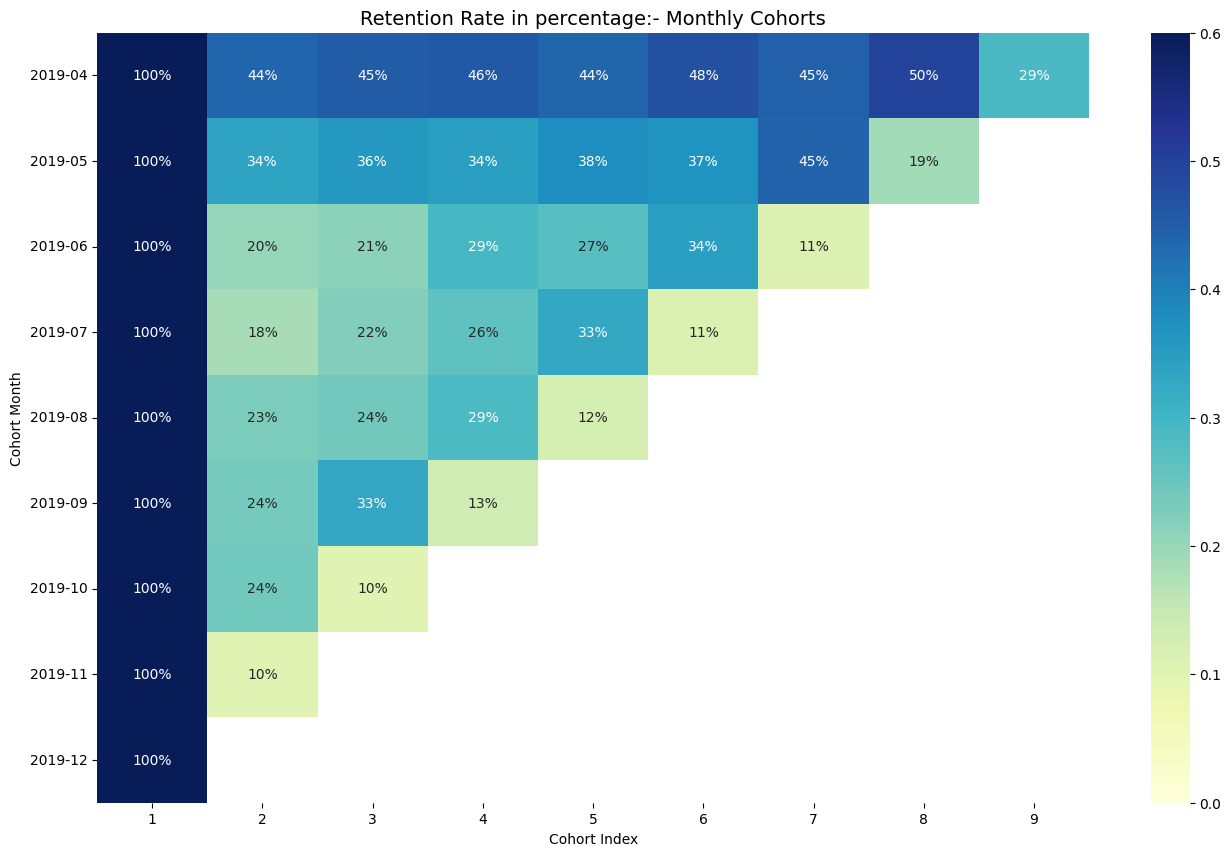

In [48]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the heatmap
sns.heatmap(cust_retention_rate_df, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='horizontal')
plt.show()

In [49]:
# Calculate average monthly retention rate
retention_rate = cust_retention_rate_df.iloc[:,1:].mean().mean()

In [50]:
# print average monthy retention rate
print(f"Average Monthly Retention Rate of All Customers : {retention_rate*100:.2f} %")

# define churn rate
churn_rate = 1 - retention_rate

# print churn rate
print(f"Average Monthly Churn Rate of All Customers : {churn_rate*100:.2f} %")

Average Monthly Retention Rate of All Customers : 30.21 %
Average Monthly Churn Rate of All Customers : 69.79 %


### 5.16 Insights
---

- In November 2011, It’s possible that there are strategies were implemented to increase user retention
- Around 47% of users from the December 2010 cohort returned in November 2011
- Customer retention in the recent cohort/month are declining, indicating a concerning drop in user buying activity
- The best customer cohort is cohort dec'18, we need to analyze and benchmark what strategies were implemented in dec'18
- Our expectation about monthly churn rate for the next period is about 76.09, we need to find the way how to reduce churn (retain customer)

## EDA Part 3
---
We will analyze:
- Monthly Repeated vs Unique Customer Count
- Monthly Repeated vs Total Revenue

## EDA Part 3
---
We will analyze:
- Monthly Repeated vs Unique Customer Count
- Monthly Repeated vs Total Revenue
### 5.17 Monthly Repeated Customers
---

In [51]:
# show data
eda_filtered.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Month,CohortMonth,CohortIndex
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,2019-12-01,2019-06-01,7
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0,2019-12-01,2019-05-01,8
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,2019-12-01,2019-05-01,8
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,2019-12-01,2019-05-01,8
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,2019-12-01,2019-05-01,8


In [52]:
# we're taking all of the transactions that occurred before December 01, 2019
eda_new = eda_filtered.loc[eda_filtered['Date'] < '2019-12-01']

In [53]:
# create Sales variable
eda_new['Sales'] = eda_new['Price']*eda_new['Quantity']

<ipython-input-53-0373388e0111>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_new['Sales'] = eda_new['Price']*eda_new['Quantity']


In [54]:
# shanity check
eda_new.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Month,CohortMonth,CohortIndex,Sales
23611,579522,2019-11-30,84879,Assorted Colour Bird Ornament,6.04,8.0,14432.0,2019-11-01,2019-09-01,3,48.32
23612,579522,2019-11-30,82486,3 Drawer Antique White Wood Cabinet,6.04,4.0,14432.0,2019-11-01,2019-09-01,3,24.16
23613,579522,2019-11-30,82483,Wood 2 Drawer Cabinet White Finish,6.04,8.0,14432.0,2019-11-01,2019-09-01,3,48.32
23614,579522,2019-11-30,23493,Vintage Doily Travel Sewing Kit,6.04,10.0,14432.0,2019-11-01,2019-09-01,3,60.40
23615,579522,2019-11-30,23240,Set Of 4 Knick Knack Tins Doily,6.19,6.0,14432.0,2019-11-01,2019-09-01,3,37.14


In [55]:
def groupby_invoice(eda_new):
    """
    Function to create groupby invoice with date, sales, and customerno

    Parameter:
    ----------
    eda_new: pandas dataframe
          filtered eda dataframe

    Return:
    ------

    invoice_groupby_df: pandas dataframe
                    grouped dataset
    """
    # Get total amount spent(Sales) per invoice and associate it with CustomerID
    invoice_groupby_df = (eda_new.groupby(by=['TransactionNo', 'Date'])
                                 .agg({
                                    'Sales': sum,
                                    'CustomerNo': max})
                                 .reset_index())

    # Sort on Amount spent, this gives us the largest invoices
    invoice_groupby_df = (invoice_groupby_df
                          .sort_values(by='Sales', ascending=False))

    return invoice_groupby_df

In [56]:
invoice_groupby_df = groupby_invoice(eda_new)

<ipython-input-55-94be774ee77d>:18: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({
<ipython-input-55-94be774ee77d>:18: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  .agg({


In [57]:
# shanity check
invoice_groupby_df.head()

,TransactionNo,Date,Sales,CustomerNo
9682,574941,2019-11-07,184880.85,15941.0
10272,576365,2019-11-14,184148.76,14365.0
6711,567423,2019-09-20,161373.58,17450.0
4774,562439,2019-08-04,135571.26,12931.0
2341,556267,2019-06-09,103655.80,13694.0


In [58]:
# check dtypes
invoice_groupby_df.dtypes

,0
TransactionNo,object
Date,datetime64[ns]
Sales,float64
CustomerNo,float64


In [59]:
def get_monthly_repeat_customers(invoice_groupby_df):
    """
    Get the count of monthly repeat customers from an invoice dataset.

    Parameters:
    -----------
    invoice_groupby_df: pandas DataFrame
                  DataFrame with 'Date' and 'CustomerNo' columns.

    Returns:
    --------
    monthly_repeat_customers: pandas DataFrame
                        DataFrame containing the monthly repeat customer count.
    """

    # Set index to 'Date'
    invoice_groupby_df = invoice_groupby_df.set_index('Date')

    # Group data by 'Date' (monthly) and 'CustomerNo', filter for repeat customers
    monthly_repeat_customers = (
        invoice_groupby_df.groupby([pd.Grouper(freq='M'), 'CustomerNo'])
        .filter(lambda x: len(x) > 1)
        .resample('M')
        .nunique()['CustomerNo']
        .reset_index()
    )

    return monthly_repeat_customers


Steps
1. Set the index of the DataFrame invoice_groupby_df to the 'Date' column.
2. Group the data by 'Date' (monthly) and 'CustomerNo' using pd.Grouper(freq='M').
3. In this case, freq='M' specifies that the data should be grouped by month.
4. It converts the 'Date' column into a monthly time period, allowing aggregation and analysis at the monthly level.
5. Use the filter() function with a lambda function to keep only the groups where the length of the group is greater than 1, indicating repeat customers.
6. The lambda function takes in each group x and checks if the length (len(x)) is greater than 1.
7. Resample the filtered data by month using the resample() function.
8. Apply the nunique() function to count the number of unique customer IDs in each month.
9. Select the 'CustomerNo' column from the result and reset the index to create a new DataFrame monthly_repeat_customers.

In [60]:
monthly_rep_cust = get_monthly_repeat_customers(invoice_groupby_df)

<ipython-input-59-0b454debc587>:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  invoice_groupby_df.groupby([pd.Grouper(freq='M'), 'CustomerNo'])
<ipython-input-59-0b454debc587>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


In [61]:
# check result
monthly_rep_cust

,Date,CustomerNo
0,2019-04-30,41
1,2019-05-31,260
2,2019-06-30,228
3,2019-07-31,223
4,2019-08-31,181
5,2019-09-30,250
6,2019-10-31,295
7,2019-11-30,512


### 5.18 Monthly Unique Customers
---

In [62]:
# check eda_filtered
eda_new.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Month,CohortMonth,CohortIndex,Sales
23611,579522,2019-11-30,84879,Assorted Colour Bird Ornament,6.04,8.0,14432.0,2019-11-01,2019-09-01,3,48.32
23612,579522,2019-11-30,82486,3 Drawer Antique White Wood Cabinet,6.04,4.0,14432.0,2019-11-01,2019-09-01,3,24.16
23613,579522,2019-11-30,82483,Wood 2 Drawer Cabinet White Finish,6.04,8.0,14432.0,2019-11-01,2019-09-01,3,48.32
23614,579522,2019-11-30,23493,Vintage Doily Travel Sewing Kit,6.04,10.0,14432.0,2019-11-01,2019-09-01,3,60.40
23615,579522,2019-11-30,23240,Set Of 4 Knick Knack Tins Doily,6.19,6.0,14432.0,2019-11-01,2019-09-01,3,37.14


In [63]:
# Resample the data on a monthly basis and count the number of unique customers
monthly_unique_customers = eda_new.set_index('Date')['CustomerNo'].resample('M')

# find unique customer
monthly_unique_customers = monthly_unique_customers.nunique()

# Reset the index and create a DataFrame
monthly_unique_customers = monthly_unique_customers.reset_index()

<ipython-input-63-6973662f1ea9>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_unique_customers = eda_new.set_index('Date')['CustomerNo'].resample('M')


In [64]:
monthly_unique_customers

,Date,CustomerNo
0,2019-04-30,305
1,2019-05-31,1061
2,2019-06-30,999
3,2019-07-31,963
4,2019-08-31,898
5,2019-09-30,1202
6,2019-10-31,1299
7,2019-11-30,1583


### 5.19 Monhtly Repeat Customers Rate
---

In [65]:
# Normalize the customer
n_repeat_cust = monthly_rep_cust['CustomerNo']
n_unique_cust = monthly_unique_customers['CustomerNo']

# calculate percentage of repeat customer
percentage_cust = (n_repeat_cust/n_unique_cust) * 100

# round it & save it to repeat ratio columns
monthly_rep_cust['Repeat Ratio'] = np.round(percentage_cust, 2)

In [66]:
monthly_rep_cust

,Date,CustomerNo,Repeat Ratio
0,2019-04-30,41,13.44
1,2019-05-31,260,24.51
2,2019-06-30,228,22.82
3,2019-07-31,223,23.16
4,2019-08-31,181,20.16
5,2019-09-30,250,20.80
6,2019-10-31,295,22.71
7,2019-11-30,512,32.34


### 5.20 Visualization

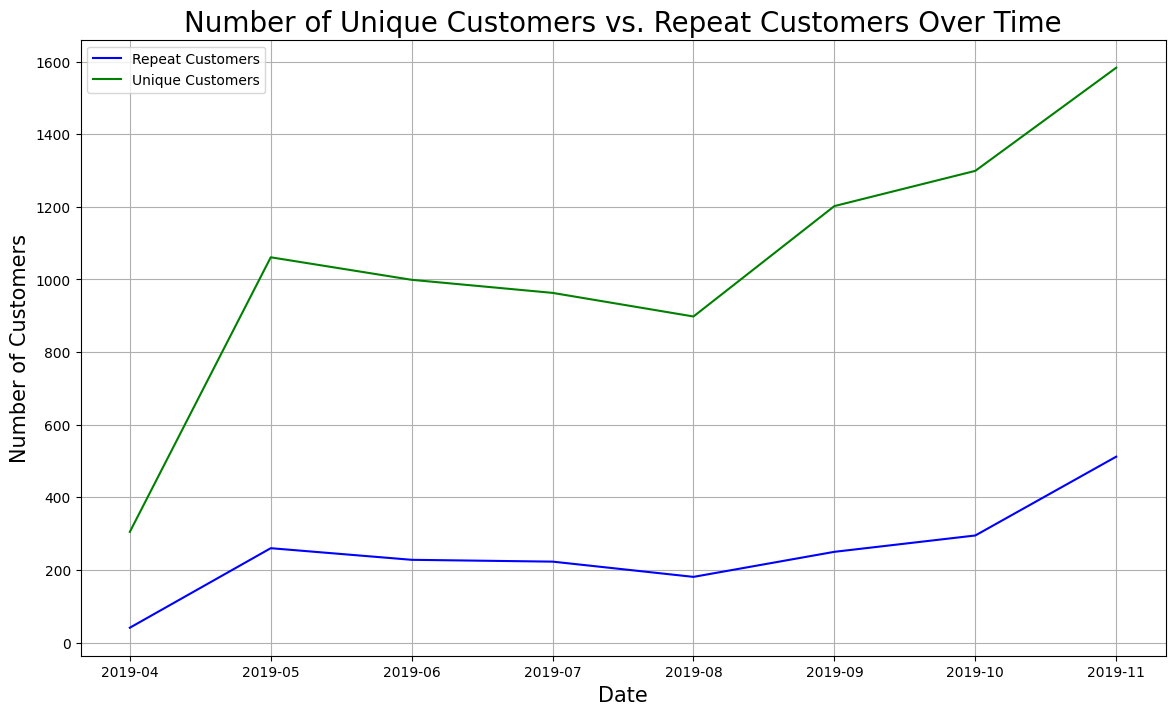

In [67]:
# plot repeat customers
ax = monthly_rep_cust['CustomerNo'].plot(figsize=(14,8), color='Blue')

# plot unique custoemrs
monthly_unique_customers['CustomerNo'].plot(ax=ax,grid=True, color='Green')

ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Unique Customers vs. Repeat Customers Over Time', fontsize=20)
plt.legend(['Repeat Customers', 'Unique Customers'])

# Adjust x-axis tick locations and labels
x_ticks = monthly_rep_cust.index
ax.set_xticks(x_ticks)
ax.set_xticklabels(monthly_rep_cust['Date'].dt.strftime('%Y-%m'))

plt.show()

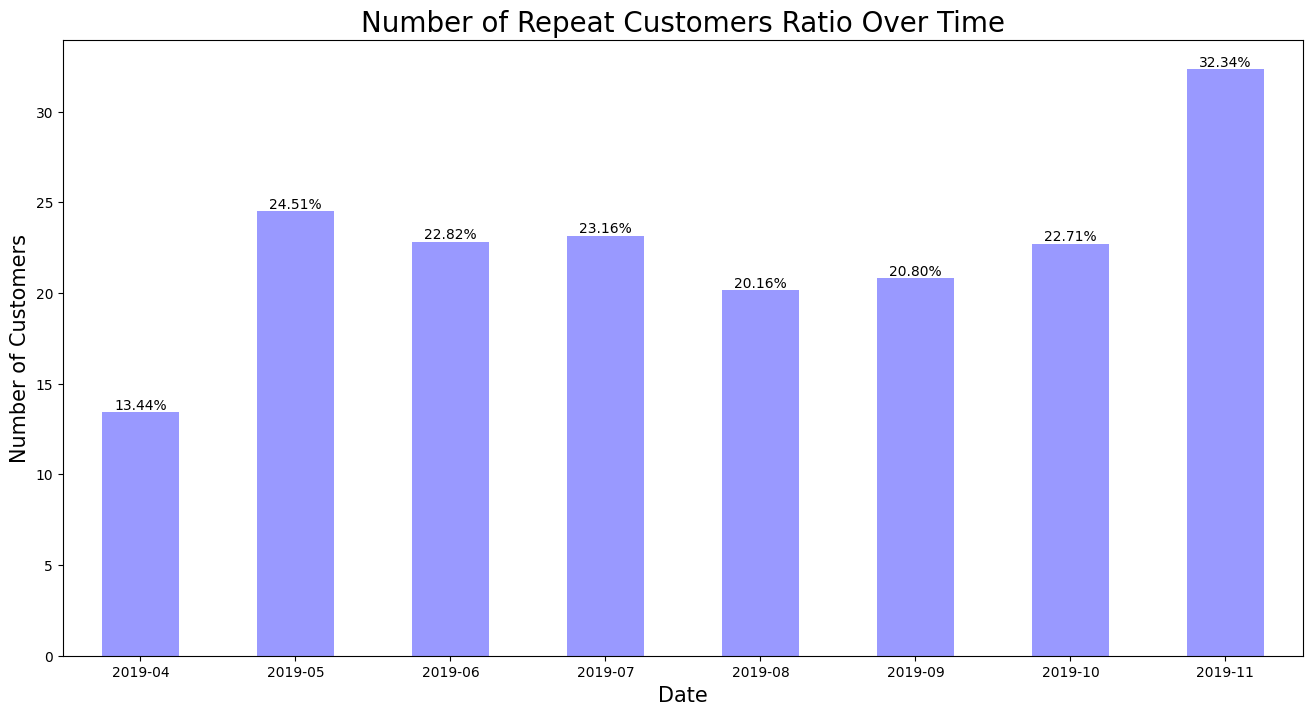

In [68]:
# plot repeat customers
ax = monthly_rep_cust['Repeat Ratio'].plot.bar(figsize=(16,8), color='Blue', alpha=0.4)

ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_title('Number of Repeat Customers Ratio Over Time', fontsize=20)

# Adjust x-axis tick locations and labels
x_ticks = monthly_rep_cust.index
ax.set_xticks(x_ticks)
ax.set_xticklabels(monthly_rep_cust['Date'].dt.strftime('%Y-%m'))
plt.xticks(rotation=360)

# Add annotations to each bar
for i, v in enumerate(monthly_rep_cust['Repeat Ratio']):
    ax.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

plt.show()

### 5.21 Monthly Total Revenue
---

In [69]:
# check data
eda_new.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Month,CohortMonth,CohortIndex,Sales
23611,579522,2019-11-30,84879,Assorted Colour Bird Ornament,6.04,8.0,14432.0,2019-11-01,2019-09-01,3,48.32
23612,579522,2019-11-30,82486,3 Drawer Antique White Wood Cabinet,6.04,4.0,14432.0,2019-11-01,2019-09-01,3,24.16
23613,579522,2019-11-30,82483,Wood 2 Drawer Cabinet White Finish,6.04,8.0,14432.0,2019-11-01,2019-09-01,3,48.32
23614,579522,2019-11-30,23493,Vintage Doily Travel Sewing Kit,6.04,10.0,14432.0,2019-11-01,2019-09-01,3,60.40
23615,579522,2019-11-30,23240,Set Of 4 Knick Knack Tins Doily,6.19,6.0,14432.0,2019-11-01,2019-09-01,3,37.14


In [70]:
# Let's investigate the relationship between revenue and repeat customers
monthly_revenue = eda_new.set_index('Date')['Sales'].resample('M').sum()

<ipython-input-70-6aec92b65332>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = eda_new.set_index('Date')['Sales'].resample('M').sum()


In [71]:
# check result
monthly_revenue

,Sales
Date,
2019-04-30,1059231.16
2019-05-31,3716492.60
2019-06-30,3568463.29
2019-07-31,3805965.53
2019-08-31,3764221.08
2019-09-30,5531507.78
2019-10-31,5740067.90
2019-11-30,6758360.85


In [72]:
def monthly_rev_perc_repeat_cust(invoice_groupby_df):
    """
    Calculate the monthly revenue percentage from repeat customers

    Parameters:
    ----------
    invoice_groupby_df: pandas DataFrame
        DataFrame containing the invoice data grouped by 'Date' and 'CustomerNo'

    Returns:
    monthly_rev_perc_repeat_cust: pandas DataFrame
        DataFrame containing the 'Date' and 'Revenue Ratio' columns,
        representing the percentage of revenue from repeat customers
        to the overall monthly revenue.
    """
    # Set index to 'Date'
    invoice_groupby_df.set_index('Date', inplace=True)

    # Group data by 'Date' (monthly) and 'CustomerNo'
    monthly_grouped = invoice_groupby_df.groupby([pd.Grouper(freq='M'), 'CustomerNo'])

    # Filter for groups with more than 1 occurrence
    filtered_groups = monthly_grouped.filter(lambda x: len(x) > 1)

    # Resample and sum the sales for repeat customers
    monthly_rev_repeat_cust = filtered_groups.resample('M').sum()['Sales']

    # Calculate the percentage of revenue from repeat customers to the overall monthly revenue
    monthly_rev_perc_repeat_cust = monthly_rev_repeat_cust / monthly_revenue * 100.0

    # Create DataFrame with 'Date' and 'Revenue Ratio' columns
    monthly_rev_perc_repeat_cust = pd.DataFrame({
        'Date': monthly_rev_perc_repeat_cust.index.get_level_values(0),
        'Revenue Ratio': monthly_rev_perc_repeat_cust.values
    })

    return monthly_rev_perc_repeat_cust

In [73]:
revenue_ratio = monthly_rev_perc_repeat_cust(invoice_groupby_df)

<ipython-input-72-b8a1d576790f>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_grouped = invoice_groupby_df.groupby([pd.Grouper(freq='M'), 'CustomerNo'])
<ipython-input-72-b8a1d576790f>:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rev_repeat_cust = filtered_groups.resample('M').sum()['Sales']


In [74]:
revenue_ratio

,Date,Revenue Ratio
0,2019-04-30,31.317421
1,2019-05-31,46.071034
2,2019-06-30,48.141709
3,2019-07-31,46.592184
4,2019-08-31,43.461421
5,2019-09-30,43.598502
6,2019-10-31,50.176276
7,2019-11-30,51.987862


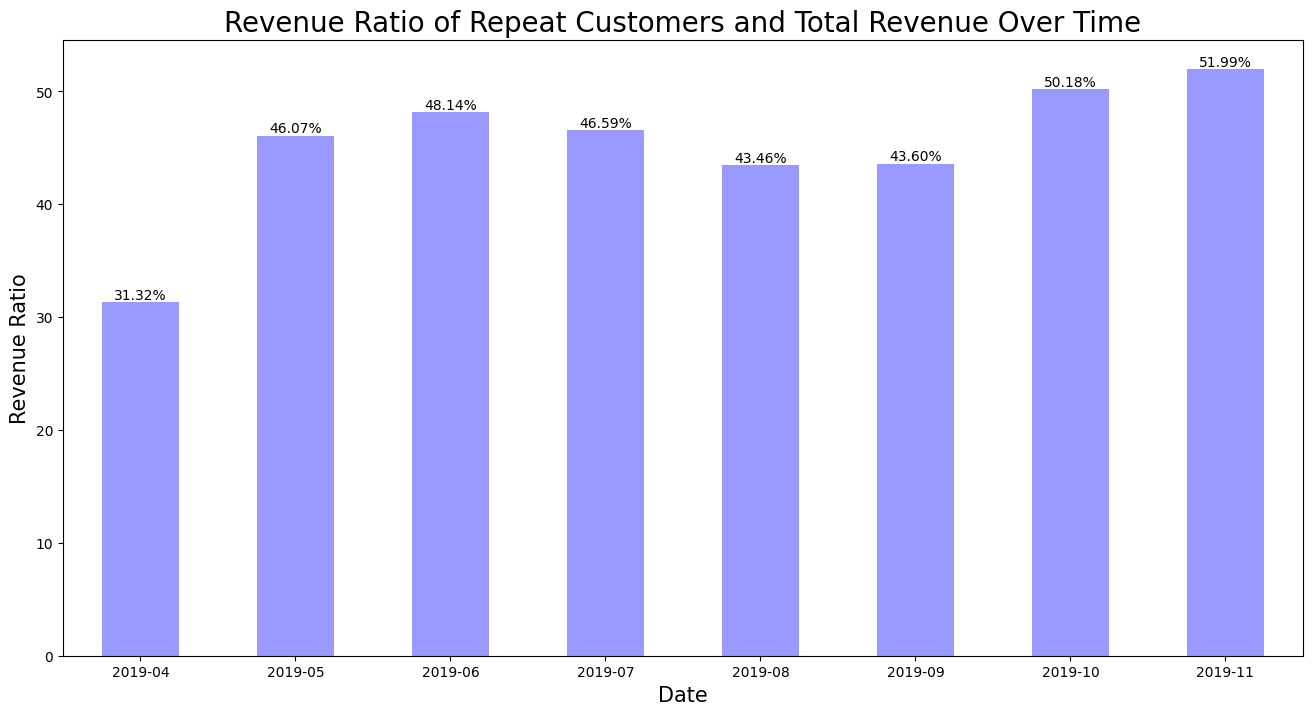

In [75]:
# plot repeat customers
ax = revenue_ratio['Revenue Ratio'].plot.bar(figsize=(16,8), color='Blue', alpha=0.4)

ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Revenue Ratio', fontsize=15)
ax.set_title('Revenue Ratio of Repeat Customers and Total Revenue Over Time', fontsize=20)

# Adjust x-axis tick locations and labels
x_ticks = revenue_ratio.index
ax.set_xticks(x_ticks)
ax.set_xticklabels(revenue_ratio['Date'].dt.strftime('%Y-%m'))
plt.xticks(rotation=360)

# Add annotations to each bar
for i, v in enumerate(revenue_ratio['Revenue Ratio']):
    ax.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

plt.show()

- In revenue contribution from repeated customer, the top 2 highest generated from end year sales (nov'18 and dec'19)
- It's also indicates that there was a good implementation campaign / marketing initiative in end year period

## **5.22 Recommendation**

- Problem: Decreasing sales and retention customer in 2011


- Recommendation:
In order to retain customer and increase seales, we can create memorable campaigns every months (e.g., 1.1, 2.2, Waktu Indonesia Belanja by Tokopedia, Harbolnas by Bukalapak)


- All company ran campaign in every december, It’s proven in Dec’11 that company succeed to retain more customers. We need to implement seasonal campaign to acquire new customers in the next cohort


- Analyze the seasonal event / special event and make it as promotional event to increase sales and retain existing customers